<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математика для Data Science.
# Домашнее задание №2.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt, cos, sin, pi

Загрузим датасет о ценах на дома в Бостоне. 

In [2]:
boston = load_boston()
print(boston.data.shape)

(506, 13)


Описание датасета:

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Каждый дом - это вектор в 13-мерном пространстве. 
Написать код для подсчета скалярного произведения двух первых домов и датасета.

In [4]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

In [5]:
# 1
sum([pair[0] * pair[1] for pair in zip(x1, x2)])

234704.86490859918

In [6]:
# 2
np.dot(x1, x2)

234704.86490859918

Нарисовать два дома в 3-мерном пространстве (атрибуты выбрать самостоятельно)

In [7]:
# Поместим данные в датафрейм
bos_pd = pd.DataFrame(boston.data)
bos_pd.columns = boston.feature_names
bos_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


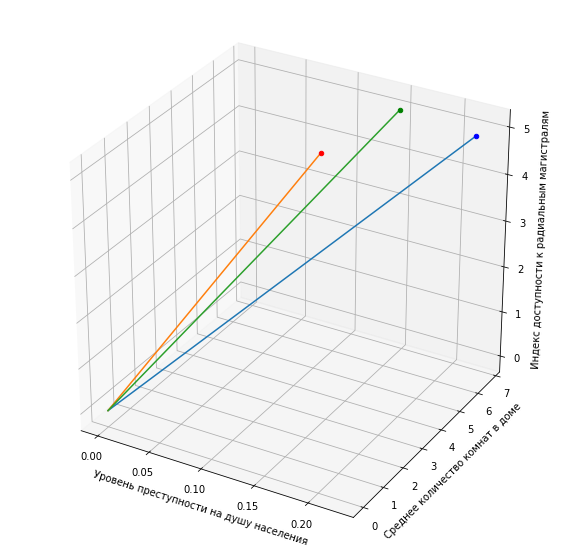

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array(bos_pd['CRIM'])
y = np.array(bos_pd['RM'])
z = np.array(bos_pd['RAD'])

ax.plot([0,x[10]], [0,y[10]], [0,z[10]])
ax.plot([0,x[50]], [0,y[50]], [0,z[50]])
ax.plot([0,x[100]], [0,y[100]], [0,z[100]])

ax.scatter(x[10], y[10], z[10], c='b', marker='o')
ax.scatter(x[50], y[50], z[50], c='r', marker='o')
ax.scatter(x[100], y[100], z[100], c='g', marker='o')

ax.set_xlabel('Уровень преступности на душу населения')
ax.set_ylabel('Среднее количество комнат в доме')
ax.set_zlabel('Индекс доступности к радиальным магистралям')

plt.show()

Найти косинус угла между векторами x1 и x2

In [9]:
np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

0.994296998616362

Найти расстояние между точками x1 и x2.

In [10]:
# 1
sqrt(sum([(pair[0] - pair[1])**2 for pair in zip(x1, x2)]))

58.955079696240766

In [11]:
# 2
np.linalg.norm(x1 - x2)

58.955079696240766

# Задание повышенного уровня.

Задан объект в пространстве 2D. 
Изменить положение объекта (сместить по оси x на 300 пикселей, по оси y на 200 пикселей).

(-200, 200)

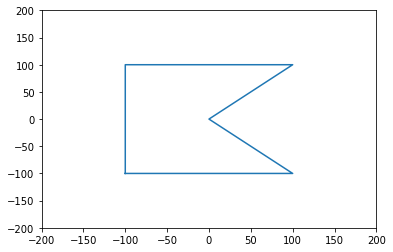

In [12]:
A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [13]:
#1
C = np.array(A) + [300,200,0]
C

array([[200, 100,   1],
       [200, 300,   1],
       [400, 300,   1],
       [300, 200,   1],
       [400, 100,   1],
       [200, 100,   1]])

(-200, 500)

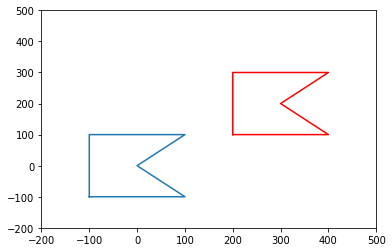

In [14]:
x = A[:,0]
y = A[:,1]
c = C[:,0]
d = C[:,1]
plt.plot(x, y)
plt.plot(c, d, color='r')
plt.ylim([-200, 500])
plt.xlim([-200, 500])

In [15]:
# 2
TransformArray = np.array([
    [1, 0, 300],
    [0, 1, 200],
    [0, 0, 1]
])

C = []
for point in A:
  new_point = np.dot(TransformArray,np.transpose(point))
  C.append(new_point)
C = np.array(C)
print(C)

[[200 100   1]
 [200 300   1]
 [400 300   1]
 [300 200   1]
 [400 100   1]
 [200 100   1]]


(-200, 500)

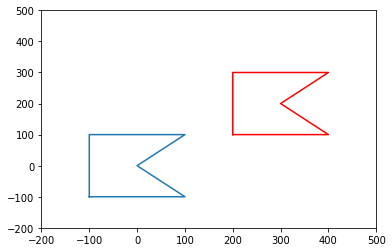

In [16]:
x = A[:,0]
y = A[:,1]
c = C[:,0]
d = C[:,1]
plt.plot(x, y)
plt.plot(c, d, color='r')
plt.ylim([-200, 500])
plt.xlim([-200, 500])

Уменьшить объект в два раза.

In [17]:
TransformArray = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 1]
])

C = []
for point in A:
  new_point = np.dot(TransformArray,np.transpose(point))
  C.append(new_point)
C = np.array(C)
print(C)

[[-200 -200    1]
 [-200  200    1]
 [ 200  200    1]
 [   0    0    1]
 [ 200 -200    1]
 [-200 -200    1]]


(-400, 400)

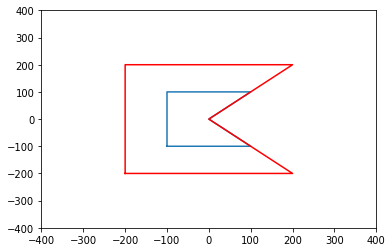

In [18]:
x = A[:,0]
y = A[:,1]
c = C[:,0]
d = C[:,1]
plt.plot(x, y)
plt.plot(c, d, color='r')
plt.ylim([-400, 400])
plt.xlim([-400, 400])

Повернуть на 130 градусов.

In [19]:
theta = 130 * 180/pi
TransformArray = np.array([
    [cos(theta), sin(theta), 0],
    [-sin(theta), cos(theta), 0],
    [0, 0, 1]
])

C = []
for point in A:
  new_point = np.dot(TransformArray,np.transpose(point))
  C.append(new_point)
C = np.array(C).astype(int)
print(C)

[[  70  122    1]
 [ 122  -70    1]
 [ -70 -122    1]
 [   0    0    1]
 [-122   70    1]
 [  70  122    1]]


(-400, 400)

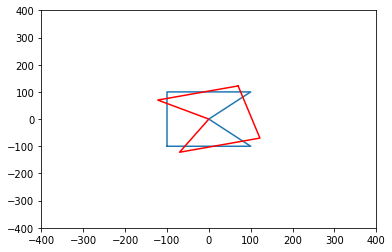

In [20]:
x = A[:,0]
y = A[:,1]
c = C[:,0]
d = C[:,1]
plt.plot(x, y)
plt.plot(c, d, color='r')
plt.ylim([-400, 400])
plt.xlim([-400, 400])

Отразить объект относительно прямой y=x

In [21]:
A

array([[-100, -100,    1],
       [-100,  100,    1],
       [ 100,  100,    1],
       [   0,    0,    1],
       [ 100, -100,    1],
       [-100, -100,    1]])

In [22]:
TransformArray = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
])

C = []
for point in A:
    new_point = np.dot(TransformArray,point)
    C.append(new_point)
C = np.array(C).astype(int)
print(C)

[[-100 -100    1]
 [ 100 -100    1]
 [ 100  100    1]
 [   0    0    1]
 [-100  100    1]
 [-100 -100    1]]


(-400, 400)

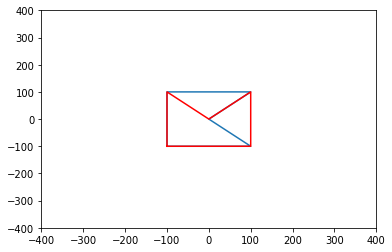

In [23]:
x = A[:,0]
y = A[:,1]
c = C[:,0]
d = C[:,1]
plt.plot(x, y)
plt.plot(c, d, color='r')
plt.ylim([-400, 400])
plt.xlim([-400, 400])